# Quantum Circuit Assignment

## Reminder
This week's assignment is a continuation of the previous one. The quantum circuit you are asked to implement is similar to last week's task, so some of the steps will feel repetitive. However, this time, you'll focus on analyzing the circuit's state by obtaining the density matrix, visualizing the Bloch sphere, and calculating the output counts for specific qubits.

## Task
1. **Build the Quantum Circuit:** Recreate the quantum circuit shown in the image below. Ensure that all gates and operations are applied correctly.

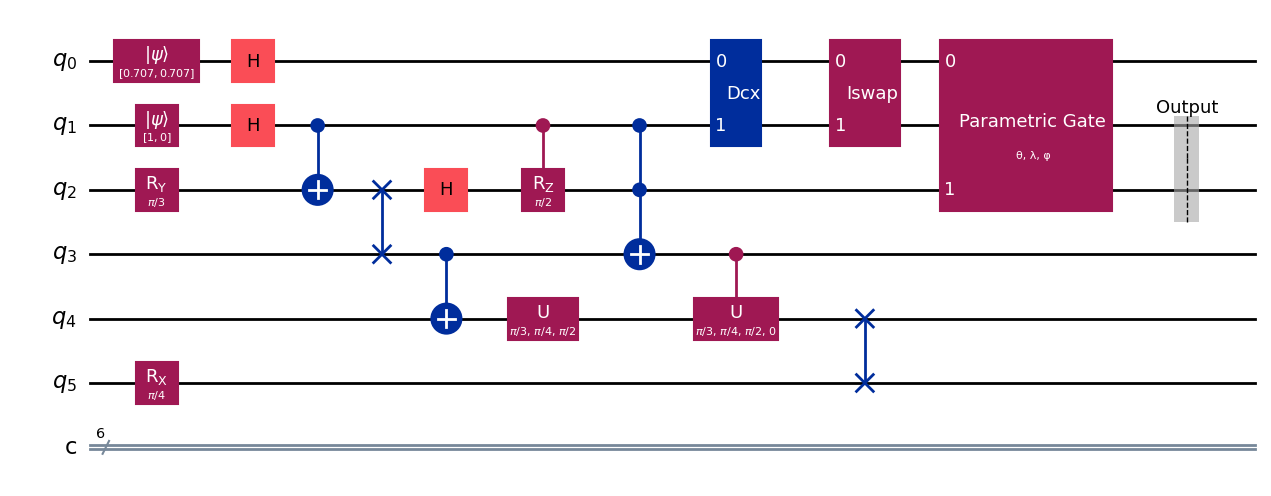
   
2. **Parametric Gate:**
   - Assign the following values to the parameters of the parametric gate:
     - θ = π/2
     - ϕ = π/4
     - λ = π/8

3. **Obtain the Density Matrix:**
   - Use the following code to obtain the density matrix of the entire circuit:
     ```python
     from qiskit.quantum_info import DensityMatrix
     density_matrix = DensityMatrix.from_instruction(qc)
     ```

4. **Partial Trace:**
   - After obtaining the complete density matrix, use the partial trace to isolate the desired qubits (qubits 1 and 2):
     ```python
     from qiskit.quantum_info import partial_trace
     reduced_density_matrix = partial_trace(density_matrix, [excessive_qubits])
     ```

5. **Visualize Results:**
   - **Density Matrix:** Display the density matrix in LaTeX form using the following command:
     ```python
     reduced_density_matrix.draw('latex')
     ```

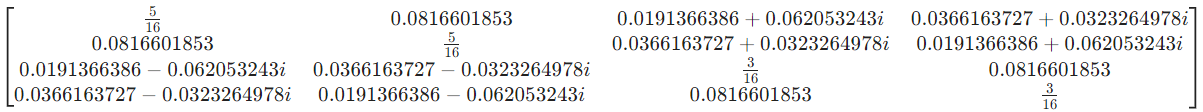


   - **Bloch Sphere:** Visualize the state on the Bloch sphere using:
     ```python
     reduced_density_matrix.draw('bloch')
     ```

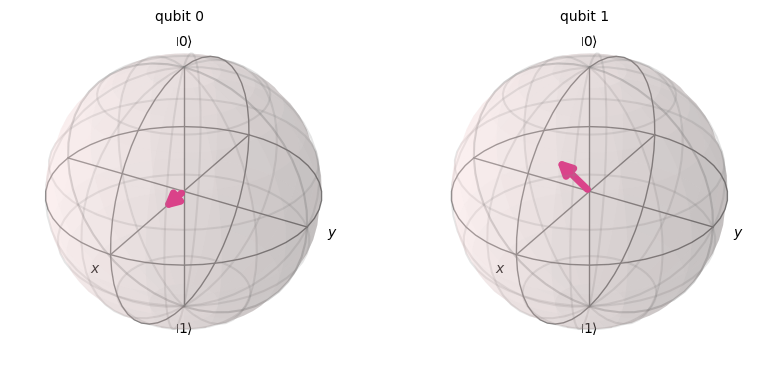

   - **Counts:** Simulate the measurement of the circuit and plot the counts for the output states of qubits 1 and 2:
     ```python
     from qiskit.visualization import plot_histogram
     counts = density_matrix.sample_counts(shots=1024)
     plot_histogram(counts)
     ```

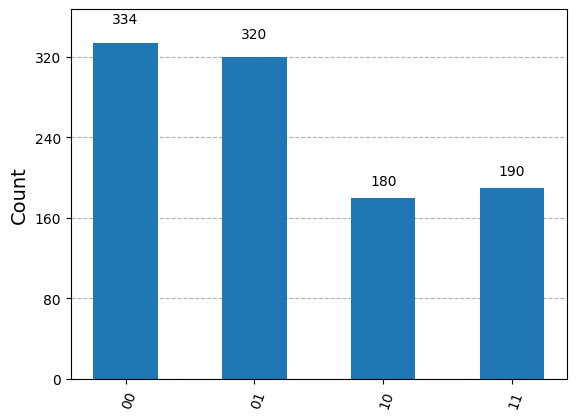

### Hint:
- Be careful when selecting the qubits for the partial trace function. Any qubits that are not qubits 1 or 2 should be passed as the list of `excessive_qubits`.
- Remember that this is an opportunity to deepen your understanding of quantum states and operations.


# My Answer ex ⚡

## Step 1: install packages

In [1]:
!pip install qiskit ipywidgets
!pip install pylatexenc

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ae88fe396b873b0cceca9021cc0857bf9ab56a7207bd29cf012bf37670d806c7
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built py

## Step 2: import Liborary

In [2]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumCircuit, Parameter

import math

## Step 3: main Code

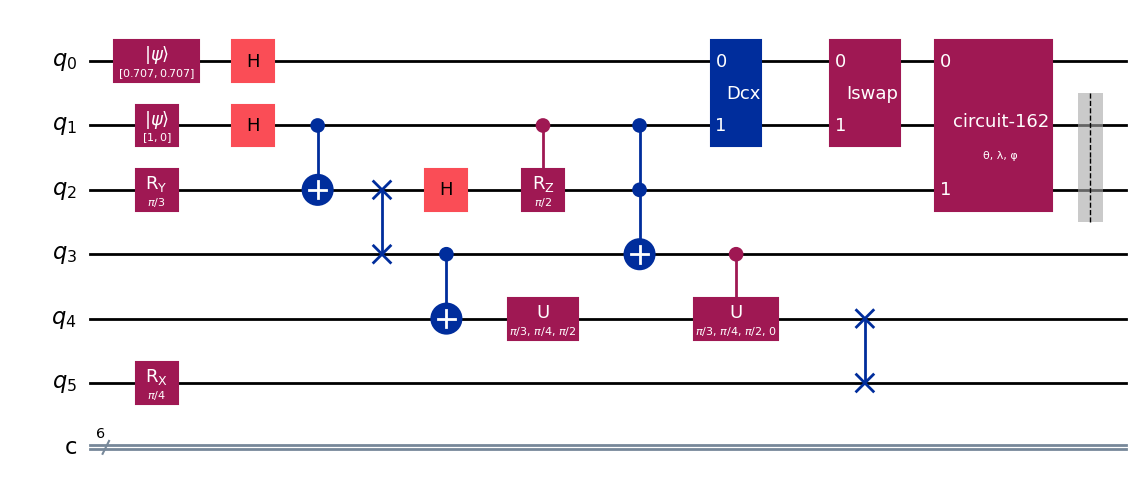

In [3]:
qc = QuantumCircuit(6,6)
qc.initialize([math.sqrt(2)/2, math.sqrt(2)/2], 0)
qc.rx(math.pi/4, 5)
qc.h(0)
qc.initialize([1, 0], 1)
qc.h(1)
qc.ry(math.pi/3, 2)
qc.cx(1, 2)
qc.swap(2, 3)
qc.h(2)
qc.cx(3, 4)
qc.crz(math.pi/2, 1, 2)
qc.ccx(1, 2, 3)
qc.u(math.pi/3, math.pi/4, math.pi/2, 4)
qc.cu(math.pi/3, math.pi/4,math.pi/2, 0, 3, 4)
qc.swap(4, 5)


qc_component = QuantumCircuit(2)
qc_component.dcx(0, 1)
qc_component.iswap(0, 1)
qc_combined = qc.compose(qc_component, qubits=[0, 1])


qc_paramQ = QuantumCircuit(2)
theta = Parameter('θ')
phi = Parameter('φ')
lamda = Parameter('λ')
qc_paramQ.rx(theta, 0)
qc_paramQ.ry(phi, 1)
qc_paramQ.rz(lamda, 1)
qc_paramQ.cx(0, 1)
qc_paramQ.to_gate()
qc_combined.append(qc_paramQ, [0, 2])

qc_combined.barrier([1,2])

# Display diagram
qc_combined.draw('mpl')

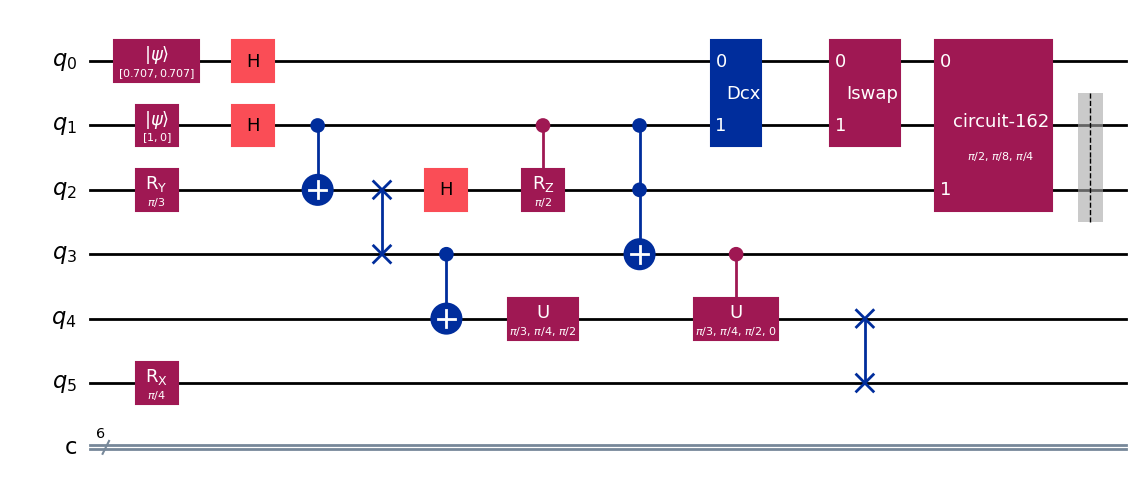

In [4]:
b_qc = qc_combined.assign_parameters({theta: math.pi/2, phi: math.pi/4, lamda: math.pi/8})

b_qc.draw('mpl')

In [5]:
from qiskit.quantum_info import DensityMatrix

density_matrix = DensityMatrix.from_instruction(b_qc)

density_matrix

DensityMatrix([[ 0.01757812+0.00000000e+00j,  0.01624007+3.92069970e-02j,
                -0.00717624+7.17623948e-03j, ...,
                -0.00085809-4.49863449e-03j,  0.00388375-5.49245591e-03j,
                -0.01163498-6.56061546e-03j],
               [ 0.01624007-3.92069970e-02j,  0.10245282+0.00000000e+00j,
                 0.00937621+2.26361703e-02j, ...,
                -0.01082671-2.24228574e-03j, -0.00866249-1.37368549e-02j,
                -0.0253824 +1.98899423e-02j],
               [-0.00717624-7.17623948e-03j,  0.00937621-2.26361703e-02j,
                 0.00585937+0.00000000e+00j, ...,
                -0.00148625+2.18687182e-03j, -0.00382782+6.56750287e-04j,
                 0.0020716 +7.42832199e-03j],
               ...,
               [-0.00085809+4.49863449e-03j, -0.01082671+2.24228574e-03j,
                -0.00148625-2.18687182e-03j, ...,
                 0.00119319-2.71050543e-20j,  0.00121605+1.26205620e-03j,
                 0.00224698-2.65739187e-03j],
    

In [10]:
from qiskit.quantum_info import partial_trace

reduced_density_matrix = partial_trace(density_matrix, [0,3,4,5])
reduced_density_matrix

DensityMatrix([[ 2.50000000e-01+7.55553389e-19j,
                 3.46944695e-18-1.38777878e-17j,
                 1.63320371e-01-1.16822784e-17j,
                 1.12146492e-01-2.92930982e-02j],
               [ 6.93889390e-18+1.38777878e-17j,
                 2.50000000e-01-6.74915852e-18j,
                -1.12146492e-01-2.92930982e-02j,
                 2.16840434e-17+4.01154804e-18j],
               [ 1.63320371e-01+1.11672824e-17j,
                -1.12146492e-01+2.92930982e-02j,
                 2.50000000e-01+3.33053355e-18j,
                -1.73472348e-17+0.00000000e+00j],
               [ 1.12146492e-01+2.92930982e-02j,
                 1.30104261e-17-5.85469173e-18j,
                -1.38777878e-17-1.38777878e-17j,
                 2.50000000e-01-7.50810004e-18j]],
              dims=(2, 2))


In [11]:
reduced_density_matrix.draw('latex')

<IPython.core.display.Latex object>

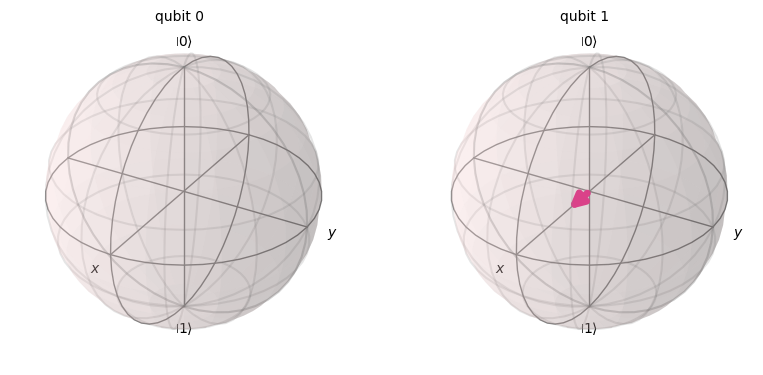

In [12]:
reduced_density_matrix.draw('bloch')

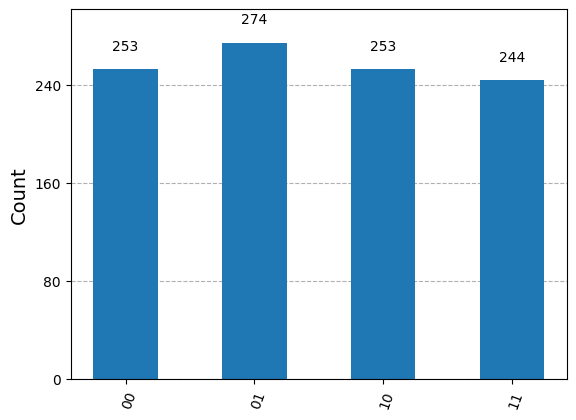

In [14]:
from qiskit.visualization import plot_histogram

counts = reduced_density_matrix.sample_counts(shots=1024)
plot_histogram(counts)

## Step 4: The end ☕
## be happy 🙂
